## Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1. [Step 4: Feature Selection](#2) 
    - RFE
    - VIF
    - Correlation
1. [Step 5: Building a Model for GT Compressor decay state coefficient ](#3)
1. [Step 5: Building a Model for GT Turbine decay state coefficient ](#4)
1. [Step 5: Building a ANN Model for GT Turbine decay state coefficient ](#5)
   


<a id="1"></a> <br>
## Reading and Understanding the Data

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
dataset = pd.read_csv('propulsion.csv',)

In [116]:
dataset=dataset.drop('Unnamed: 0',axis=1)

In [117]:
dataset_1 = dataset.drop('GT Turbine decay state coefficient.',axis=1)
dataset_2 = dataset.drop('GT Compressor decay state coefficient.',axis=1)

In [ ]:
dataset_1.head()

In [ ]:
dataset_1.info()

In [ ]:
dataset_2.head()

In [ ]:
dataset_2.info()

<a id="2"></a> <br>
## Feature selection

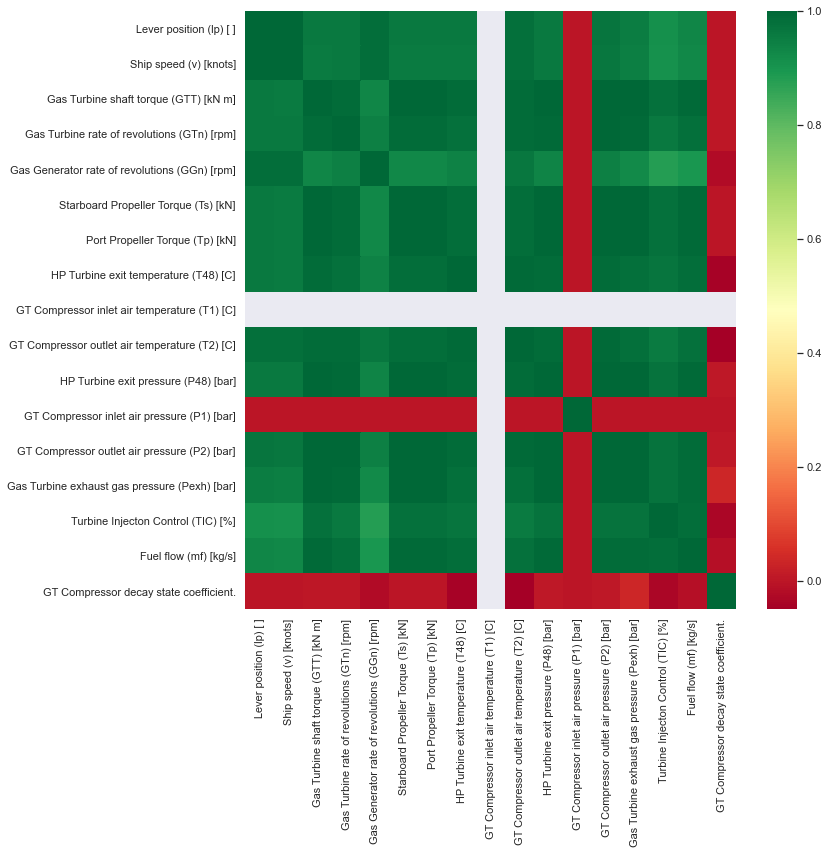

In [124]:
plt.figure(figsize = (11, 11))
sns.heatmap(dataset_1.corr(), cmap="RdYlGn")
plt.show()

#### Here two colums have constant values so we'll drop those

In [125]:
dataset_1['GT Compressor inlet air temperature (T1) [C]'].unique()

array([288.])

In [126]:
dataset_1['GT Compressor inlet air pressure (P1) [bar]'].unique()

array([0.998])

In [127]:
dataset_1=dataset_1.drop(['GT Compressor inlet air temperature (T1) [C]','GT Compressor inlet air pressure (P1) [bar]'],axis=1)

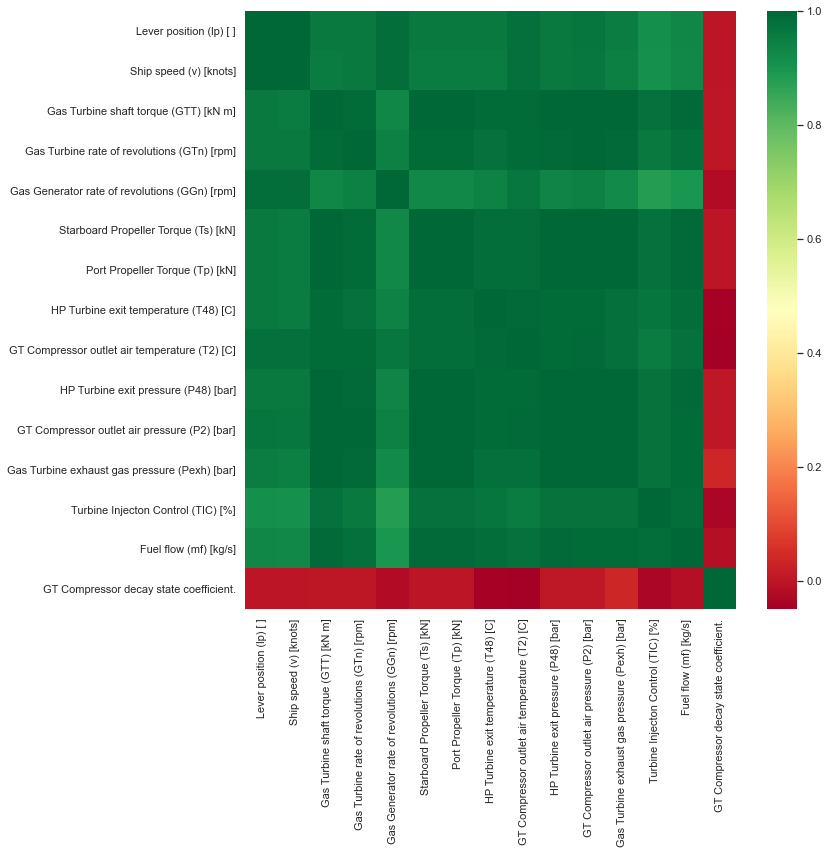

In [128]:
plt.figure(figsize = (11, 11))
sns.heatmap(dataset_1.corr(), cmap="RdYlGn")
plt.show()

In [102]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# variables = dataset_1.drop('GT Compressor decay state coefficient.',axis=1)
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# vif["Features"] = variables.columns
# vif

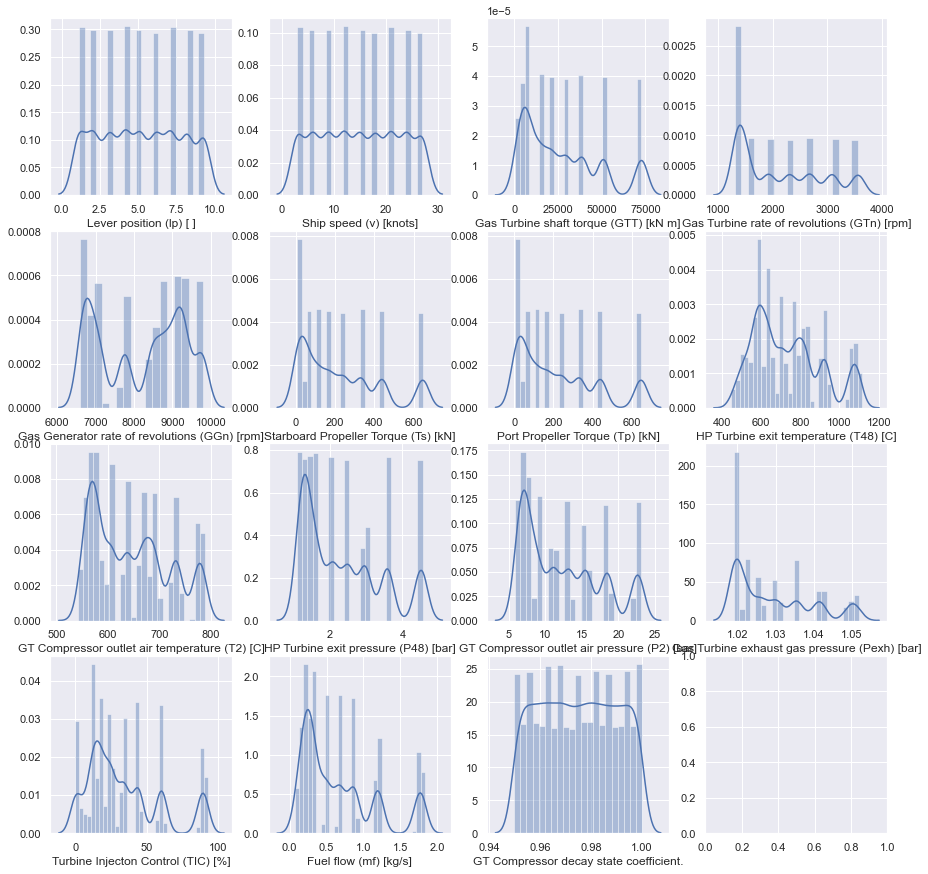

In [66]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15,15))
for i, column in enumerate(dataset_1.columns):
    sns.distplot(dataset_1[column],ax=axes[i//4,i%4])

#### Scale the data 

In [129]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dataset_1.drop(["GT Compressor decay state coefficient."],axis = 1),),
        columns=['Lever position', 'Ship speed',
       'Gas Turbine shaft torque',
       'Gas Turbine rate of revolutions',
       'Gas Generator rate of revolutions',
       'Starboard Propeller Torque',
       'Port Propeller Torque',
       'HP Turbine exit temperature',
       'GT Compressor outlet air temperature',
       'HP Turbine exit pressure',
       'GT Compressor outlet air pressure',
       'Gas Turbine exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel_flow'
       ])

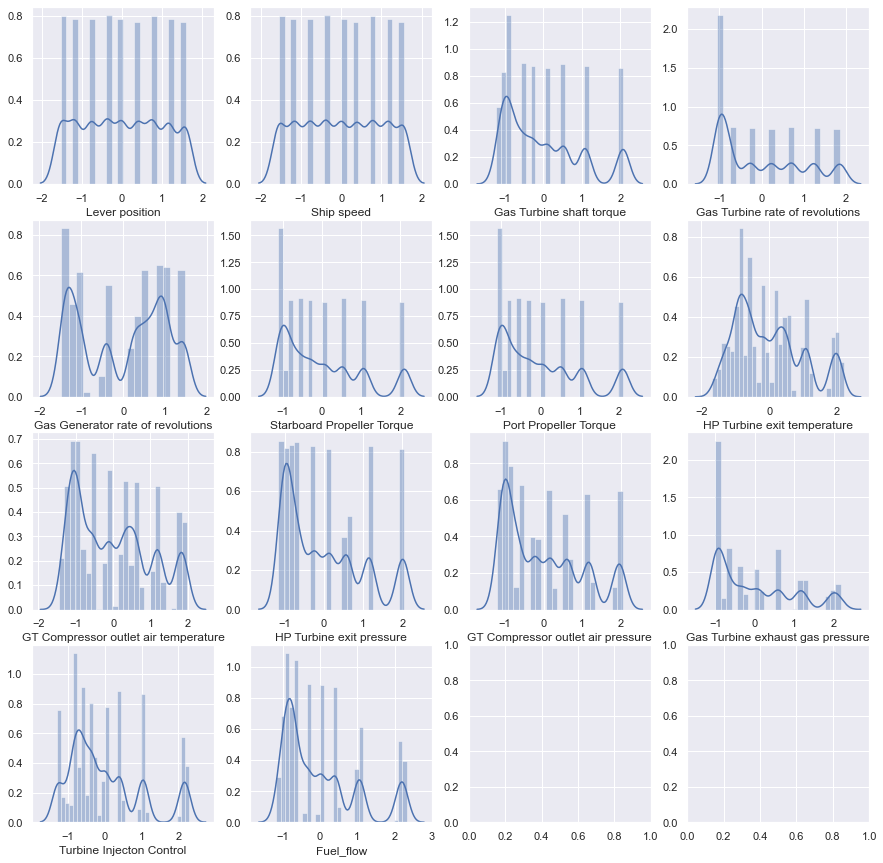

In [94]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15,15))
for i, column in enumerate(X.columns):
    sns.distplot(X[column],ax=axes[i//4,i%4])

In [130]:
X['GT Compressor decay state coefficient']= dataset_1['GT Compressor decay state coefficient.']

In [131]:
X

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow,GT Compressor decay state coefficient
0,1.581596,1.556651,2.069723,1.850934,1.430177,2.097094,2.097094,2.035294,1.856458,2.014154,1.995358,1.989602,2.214359,2.240446,0.973
1,0.390614,0.393872,0.120567,0.227505,0.537205,0.100403,0.100403,0.245345,0.272657,0.159362,0.220918,0.057762,0.043362,0.051310,0.995
2,-0.764544,-0.768907,-0.848751,-0.964049,-1.047727,-0.829327,-0.829327,-0.836484,-0.899041,-0.882282,-0.882727,-0.908158,-0.816616,-0.816420,0.980
3,-0.764544,-0.768907,-0.848669,-0.964037,-1.004767,-0.829222,-0.829222,-0.946964,-0.954533,-0.884132,-0.912236,-0.811566,-0.847681,-0.848118,0.984
4,0.390614,0.393872,0.120591,0.227505,0.539050,0.100453,0.100453,0.204501,0.247422,0.159362,0.208889,0.154354,0.026177,0.033480,0.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.167001,-1.156500,-0.962840,-1.012893,-1.336900,-1.015315,-1.015315,-0.887045,-1.115172,-0.972940,-0.990799,-1.004750,-0.462578,-0.820382,0.999
9996,-0.003840,0.006279,-0.247801,-0.267819,0.277828,-0.253694,-0.253694,-0.221064,-0.135969,-0.247675,-0.247267,-0.328606,-0.349905,-0.344914,0.971
9997,1.164657,1.169058,1.083062,1.238587,1.036458,1.061911,1.061911,1.121701,1.265104,1.123299,1.115938,1.120274,1.042956,1.059700,0.953
9998,0.390614,0.393872,0.120591,0.227537,0.549392,0.100212,0.100212,0.283316,0.314697,0.154737,0.216031,0.057762,0.055920,0.063197,0.982


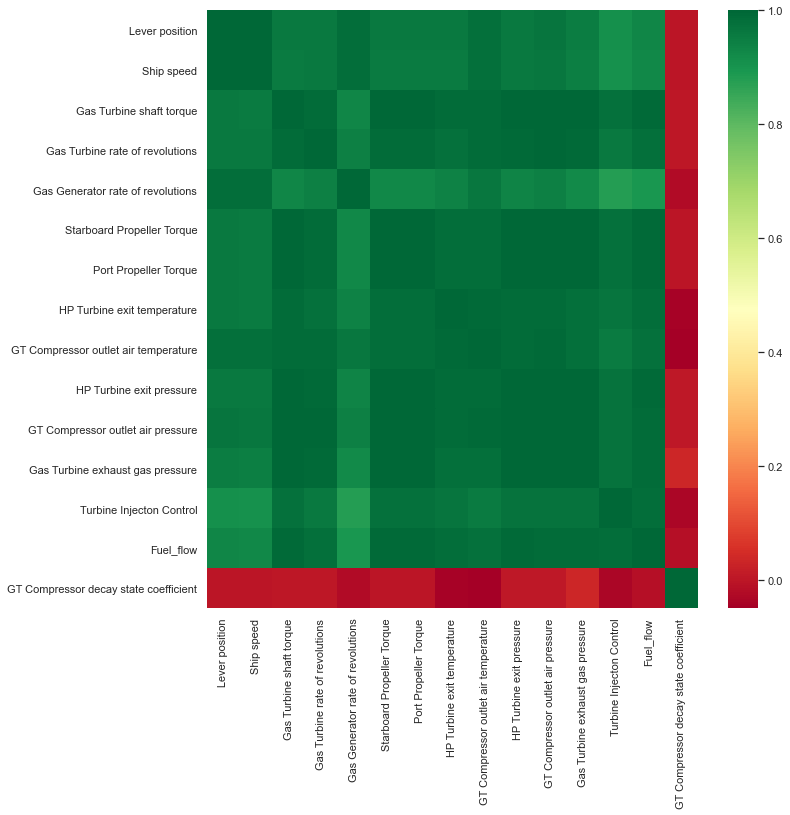

In [132]:
plt.figure(figsize = (11, 11))
sns.heatmap(X.corr(), cmap="RdYlGn")
plt.show()

#### Here we can see that all the features have  internal correlation is high But with target variable is too low 

In [133]:
Features=X.drop('GT Compressor decay state coefficient',axis=1)
targets = X['GT Compressor decay state coefficient']

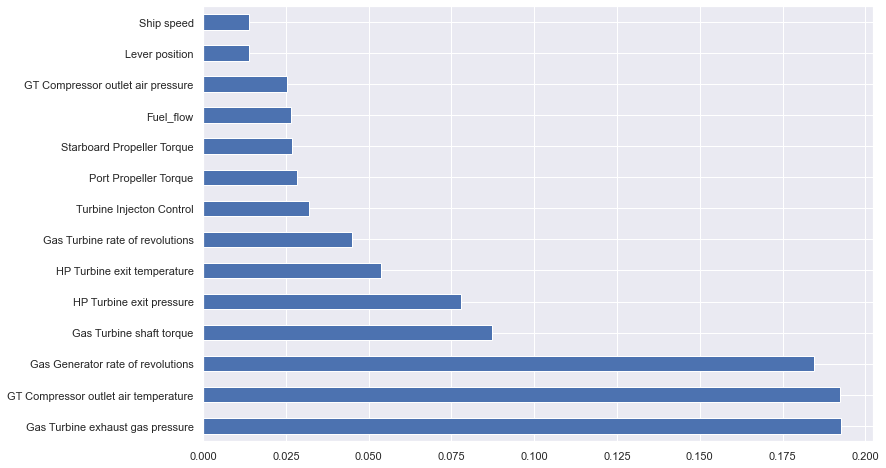

In [98]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(Features,targets)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=Features.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(Features,targets)
print('Chosen best 15 feature by rfe:',Features.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['Gas Turbine shaft torque', 'Gas Turbine rate of revolutions',
       'Gas Generator rate of revolutions', 'Starboard Propeller Torque',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor outlet air pressure', 'Gas Turbine exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel_flow'],
      dtype='object')


#### Using REF we'll take top 10 features 

In [162]:
x=Features[['Gas Turbine shaft torque', 'Gas Turbine rate of revolutions',
       'Gas Generator rate of revolutions', 'Starboard Propeller Torque',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor outlet air pressure', 'Gas Turbine exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel_flow']]
y=targets

#### Data preparation

In [163]:
x

,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow
0,2.069723,1.850934,1.430177,2.097094,1.856458,2.014154,1.995358,1.989602,2.214359,2.240446
1,0.120567,0.227505,0.537205,0.100403,0.272657,0.159362,0.220918,0.057762,0.043362,0.051310
2,-0.848751,-0.964049,-1.047727,-0.829327,-0.899041,-0.882282,-0.882727,-0.908158,-0.816616,-0.816420
3,-0.848669,-0.964037,-1.004767,-0.829222,-0.954533,-0.884132,-0.912236,-0.811566,-0.847681,-0.848118
4,0.120591,0.227505,0.539050,0.100453,0.247422,0.159362,0.208889,0.154354,0.026177,0.033480
...,...,...,...,...,...,...,...,...,...,...
9995,-0.962840,-1.012893,-1.336900,-1.015315,-1.115172,-0.972940,-0.990799,-1.004750,-0.462578,-0.820382
9996,-0.247801,-0.267819,0.277828,-0.253694,-0.135969,-0.247675,-0.247267,-0.328606,-0.349905,-0.344914
9997,1.083062,1.238587,1.036458,1.061911,1.265104,1.123299,1.115938,1.120274,1.042956,1.059700
9998,0.120591,0.227537,0.549392,0.100212,0.314697,0.154737,0.216031,0.057762,0.055920,0.063197


In [165]:
dataset_1 = x.copy()
dataset_1['GT Compressor decay state coefficient'] = y

In [166]:
dataset_1

,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow,GT Compressor decay state coefficient
0,2.069723,1.850934,1.430177,2.097094,1.856458,2.014154,1.995358,1.989602,2.214359,2.240446,0.973
1,0.120567,0.227505,0.537205,0.100403,0.272657,0.159362,0.220918,0.057762,0.043362,0.051310,0.995
2,-0.848751,-0.964049,-1.047727,-0.829327,-0.899041,-0.882282,-0.882727,-0.908158,-0.816616,-0.816420,0.980
3,-0.848669,-0.964037,-1.004767,-0.829222,-0.954533,-0.884132,-0.912236,-0.811566,-0.847681,-0.848118,0.984
4,0.120591,0.227505,0.539050,0.100453,0.247422,0.159362,0.208889,0.154354,0.026177,0.033480,0.998
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.962840,-1.012893,-1.336900,-1.015315,-1.115172,-0.972940,-0.990799,-1.004750,-0.462578,-0.820382,0.999
9996,-0.247801,-0.267819,0.277828,-0.253694,-0.135969,-0.247675,-0.247267,-0.328606,-0.349905,-0.344914,0.971
9997,1.083062,1.238587,1.036458,1.061911,1.265104,1.123299,1.115938,1.120274,1.042956,1.059700,0.953
9998,0.120591,0.227537,0.549392,0.100212,0.314697,0.154737,0.216031,0.057762,0.055920,0.063197,0.982


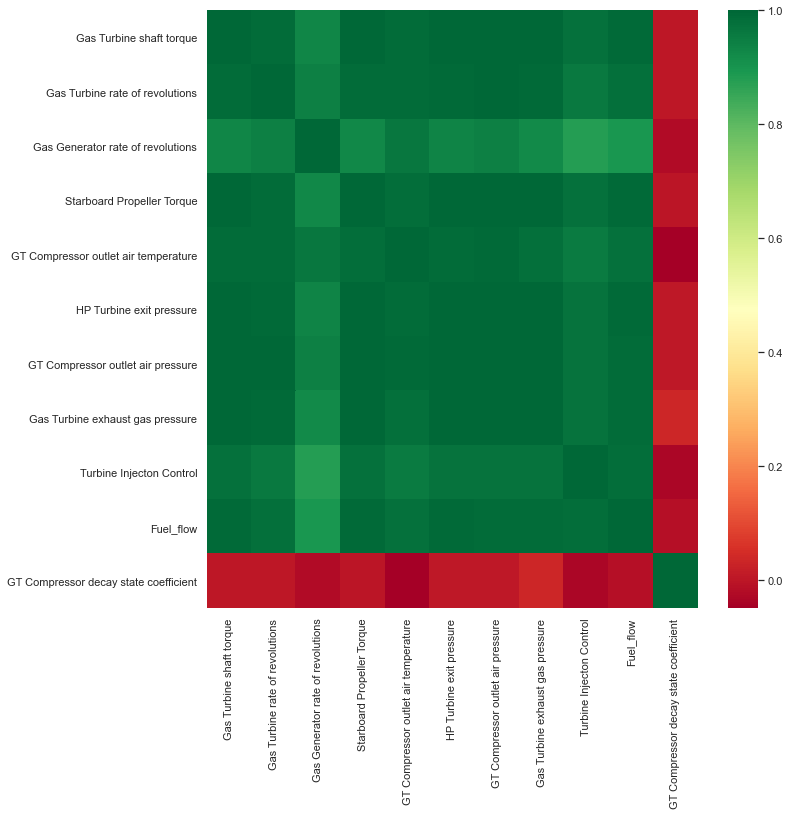

In [171]:
plt.figure(figsize = (11, 11))
sns.heatmap(dataset_1.corr(), cmap="RdYlGn")
plt.show()

In [168]:
dataset_2 = x.copy()
dataset_2['GT Turbine decay state coefficient'] = dataset['GT Turbine decay state coefficient.']

In [170]:
dataset_2

,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow,GT Turbine decay state coefficient
0,2.069723,1.850934,1.430177,2.097094,1.856458,2.014154,1.995358,1.989602,2.214359,2.240446,0.978
1,0.120567,0.227505,0.537205,0.100403,0.272657,0.159362,0.220918,0.057762,0.043362,0.051310,0.975
2,-0.848751,-0.964049,-1.047727,-0.829327,-0.899041,-0.882282,-0.882727,-0.908158,-0.816616,-0.816420,0.978
3,-0.848669,-0.964037,-1.004767,-0.829222,-0.954533,-0.884132,-0.912236,-0.811566,-0.847681,-0.848118,1.000
4,0.120591,0.227505,0.539050,0.100453,0.247422,0.159362,0.208889,0.154354,0.026177,0.033480,0.980
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.962840,-1.012893,-1.336900,-1.015315,-1.115172,-0.972940,-0.990799,-1.004750,-0.462578,-0.820382,0.988
9996,-0.247801,-0.267819,0.277828,-0.253694,-0.135969,-0.247675,-0.247267,-0.328606,-0.349905,-0.344914,1.000
9997,1.083062,1.238587,1.036458,1.061911,1.265104,1.123299,1.115938,1.120274,1.042956,1.059700,0.996
9998,0.120591,0.227537,0.549392,0.100212,0.314697,0.154737,0.216031,0.057762,0.055920,0.063197,0.975


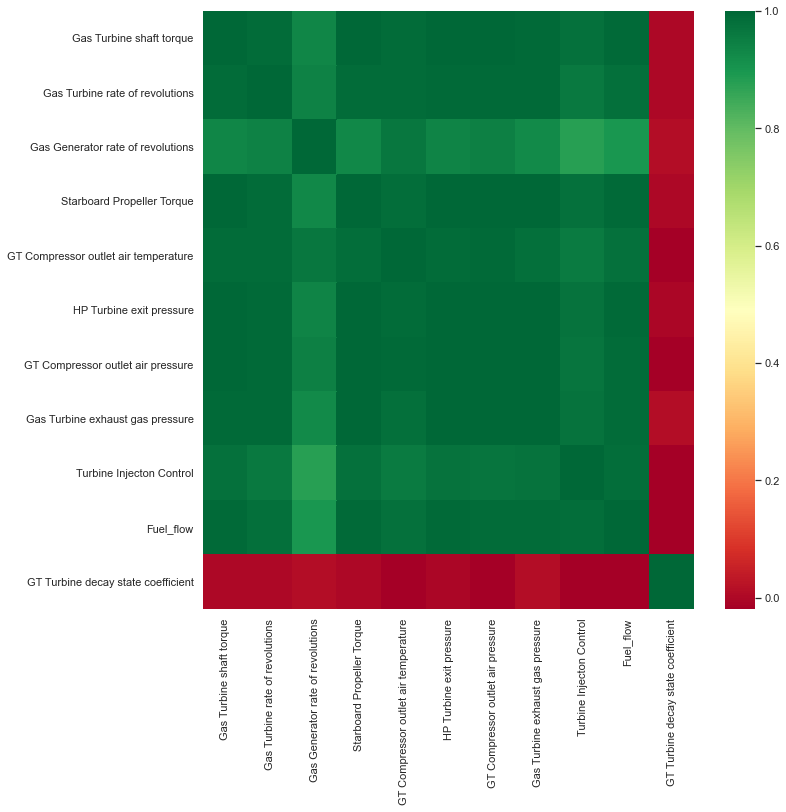

In [172]:
plt.figure(figsize = (11, 11))
sns.heatmap(dataset_2.corr(), cmap="RdYlGn")
plt.show()

<a id="3"></a> <br>
## GT Compressor decay state coefficient

### For model building we'll use Pycaret library to test multiple models 

In [173]:
dataset_1.head()

,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow,GT Compressor decay state coefficient
0,2.069723,1.850934,1.430177,2.097094,1.856458,2.014154,1.995358,1.989602,2.214359,2.240446,0.973
1,0.120567,0.227505,0.537205,0.100403,0.272657,0.159362,0.220918,0.057762,0.043362,0.051310,0.995
2,-0.848751,-0.964049,-1.047727,-0.829327,-0.899041,-0.882282,-0.882727,-0.908158,-0.816616,-0.816420,0.980
3,-0.848669,-0.964037,-1.004767,-0.829222,-0.954533,-0.884132,-0.912236,-0.811566,-0.847681,-0.848118,0.984
4,0.120591,0.227505,0.539050,0.100453,0.247422,0.159362,0.208889,0.154354,0.026177,0.033480,0.998


In [174]:
data = dataset_1.sample(frac=0.90, random_state=786).reset_index(drop=True)
data_unseen = dataset_1.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9000, 11)
Unseen Data For Predictions: (1000, 11)


In [194]:
exp_reg101 = setup(data = data, target = 'GT Compressor decay state coefficient', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(9000, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [195]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.000400,0.000000,0.001000,0.995700,0.000500,0.000400
1,Random Forest,0.000700,0.000000,0.001700,0.986500,0.000900,0.000800
2,K Neighbors Regressor,0.000900,0.000000,0.002100,0.980000,0.001000,0.001000
3,Light Gradient Boosting Machine,0.001300,0.000000,0.002200,0.978000,0.001100,0.001300
4,CatBoost Regressor,0.001400,0.000000,0.002200,0.977800,0.001100,0.001500
5,Decision Tree,0.001300,0.000000,0.002800,0.962200,0.001400,0.001300
6,Gradient Boosting Regressor,0.004000,0.000000,0.005500,0.861500,0.002800,0.004200
7,Extreme Gradient Boosting,0.004500,0.000000,0.006000,0.832000,0.003000,0.004700
8,Bayesian Ridge,0.010100,0.000100,0.012200,0.308600,0.006200,0.010400
9,Linear Regression,0.010100,0.000100,0.012200,0.308600,0.006200,0.010400


## Extra Trees Regressor has high R2 and less RMSE 

### we'll proceed with building Extra Trees Regressor model

In [196]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0004,0.0,0.0009,0.9966,0.0004,0.0004
1,0.0005,0.0,0.0012,0.9928,0.0006,0.0005
2,0.0004,0.0,0.0009,0.9966,0.0004,0.0004
3,0.0004,0.0,0.0010,0.9951,0.0005,0.0004
4,0.0004,0.0,0.0010,0.9956,0.0005,0.0005
5,0.0004,0.0,0.0009,0.9966,0.0004,0.0004
6,0.0005,0.0,0.0011,0.9944,0.0006,0.0005
7,0.0004,0.0,0.0010,0.9952,0.0005,0.0004
8,0.0004,0.0,0.0007,0.9975,0.0004,0.0004
9,0.0004,0.0,0.0009,0.9966,0.0004,0.0004


In [197]:
tuned_etr = tune_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0005,0.0,0.0011,0.9942,0.0006,0.0005
1,0.0006,0.0,0.0015,0.9889,0.0008,0.0006
2,0.0005,0.0,0.0012,0.9933,0.0006,0.0005
3,0.0005,0.0,0.0013,0.9920,0.0007,0.0005
4,0.0005,0.0,0.0013,0.9921,0.0007,0.0006
5,0.0005,0.0,0.0012,0.9937,0.0006,0.0005
6,0.0006,0.0,0.0014,0.9908,0.0007,0.0006
7,0.0005,0.0,0.0014,0.9912,0.0007,0.0006
8,0.0005,0.0,0.0010,0.9951,0.0005,0.0005
9,0.0005,0.0,0.0011,0.9941,0.0006,0.0005


### Residual plot


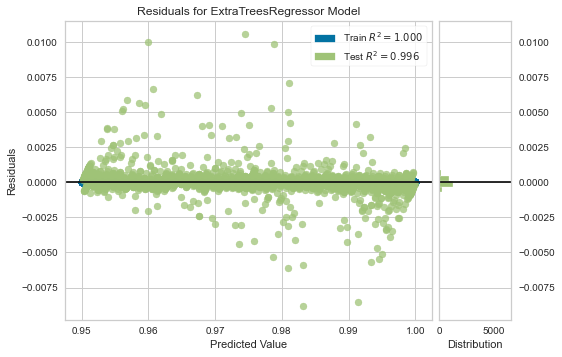

In [198]:
plot_model(et)

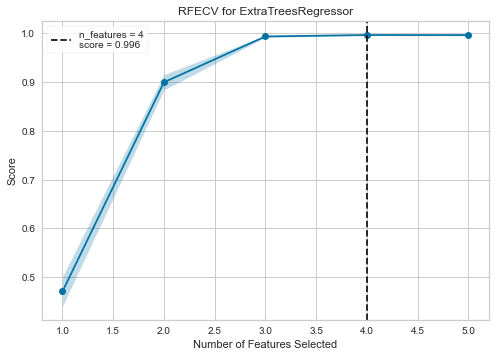

In [199]:
plot_model(et, plot='rfe')

### Feature Importance

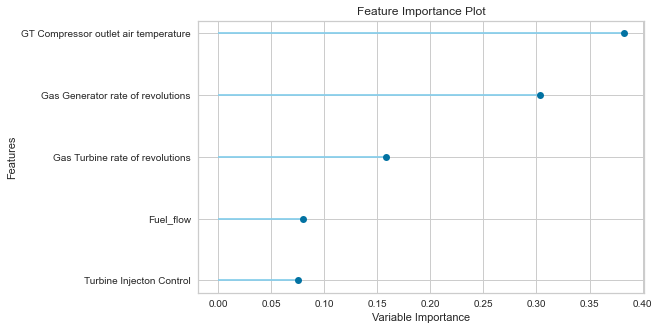

In [200]:
plot_model(et, plot='feature')

In [202]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [220]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0167,0.0004,0.0205,-6.5475,0.0104,0.0169


,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,GT Compressor outlet air temperature,Turbine Injecton Control,Fuel_flow,GT Turbine decay state coefficient,Label
0,1.238532,1.024420,1.193539,1.035491,1.051775,0.990,0.9722
1,-0.969632,-1.293937,-1.172195,-1.280993,-1.030381,0.981,0.9793
2,1.850926,1.429386,1.858611,2.218558,2.244408,0.977,0.9732
3,-0.755898,-0.364277,-0.512421,-0.632676,-0.630195,0.991,0.9620
4,0.708278,0.853253,0.618134,0.418744,0.429704,0.984,0.9751
...,...,...,...,...,...,...,...
2696,-0.755923,-0.436620,-0.582924,-0.641658,-0.640100,0.984,0.9910
2697,-0.267858,0.269960,-0.058472,-0.300800,-0.295386,0.981,0.9620
2698,-0.964026,-0.994658,-0.805553,-0.793599,-0.792646,0.975,0.9512
2699,0.227423,0.558639,0.270988,0.019879,0.027537,0.987,0.9842


In [205]:
unseen_predictions = predict_model(tuned_etr, data=data_unseen)
unseen_predictions.head()


,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow,GT Compressor decay state coefficient,Label
0,0.539373,0.708270,0.850867,0.532881,0.534676,0.586751,0.609223,0.637314,0.370184,0.380176,0.990,0.9900
1,-1.110503,-1.026715,-1.448252,-1.097277,-1.292753,-1.075624,-1.107516,-1.004750,-0.495043,-0.966985,0.995,0.9949
2,0.120628,0.227528,0.548338,0.100212,0.254293,0.155662,0.196296,0.154354,0.020617,0.027537,0.992,0.9920
3,-0.561173,-0.755913,-0.407939,-0.561778,-0.574935,-0.633434,-0.633129,-0.618382,-0.647490,-0.646044,0.983,0.9833
4,0.538836,0.708287,0.856783,0.532160,0.658849,0.576575,0.626139,0.540722,0.434374,0.445553,0.966,0.9661


In [210]:
from sklearn.metrics import r2_score
print(r2_score(unseen_predictions['GT Compressor decay state coefficient'],unseen_predictions.Label))

0.9982172298256409


In [217]:
save_model(et,'Extra tree regressor 1')

Transformation Pipeline and Model Succesfully Saved


### Outcomes :
#### 1. After testing multiple columns we have created Extra Trees Regressor modes .
#### 2. We got R2 =	0.992 , RMSE = 0.0013 
#### 3. Tested on test data got R2 = 0.998

<a id="4"></a> <br>
## GT Turbine decay state coefficient

In [212]:
dataset_2.head()

,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow,GT Turbine decay state coefficient
0,2.069723,1.850934,1.430177,2.097094,1.856458,2.014154,1.995358,1.989602,2.214359,2.240446,0.978
1,0.120567,0.227505,0.537205,0.100403,0.272657,0.159362,0.220918,0.057762,0.043362,0.051310,0.975
2,-0.848751,-0.964049,-1.047727,-0.829327,-0.899041,-0.882282,-0.882727,-0.908158,-0.816616,-0.816420,0.978
3,-0.848669,-0.964037,-1.004767,-0.829222,-0.954533,-0.884132,-0.912236,-0.811566,-0.847681,-0.848118,1.000
4,0.120591,0.227505,0.539050,0.100453,0.247422,0.159362,0.208889,0.154354,0.026177,0.033480,0.980


In [213]:
data = dataset_2.sample(frac=0.90, random_state=786).reset_index(drop=True)
data_unseen = dataset_2.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9000, 11)
Unseen Data For Predictions: (1000, 11)


In [214]:
exp_reg101 = setup(data = data, target = 'GT Turbine decay state coefficient', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(9000, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [215]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.000400,0.000000,0.000800,0.988300,0.000400,0.000400
1,Random Forest,0.000600,0.000000,0.001100,0.977300,0.000600,0.000600
2,Light Gradient Boosting Machine,0.001000,0.000000,0.001500,0.959000,0.000800,0.001100
3,CatBoost Regressor,0.001000,0.000000,0.001500,0.957500,0.000800,0.001000
4,K Neighbors Regressor,0.000900,0.000000,0.001700,0.945700,0.000900,0.000900
5,Decision Tree,0.001000,0.000000,0.001800,0.940400,0.000900,0.001000
6,Gradient Boosting Regressor,0.002800,0.000000,0.003600,0.767200,0.001800,0.002800
7,Extreme Gradient Boosting,0.003200,0.000000,0.004000,0.715000,0.002000,0.003200
8,AdaBoost Regressor,0.006200,0.000100,0.007200,0.063600,0.003600,0.006300
9,Linear Regression,0.006300,0.000100,0.007300,0.047800,0.003700,0.006400


In [218]:
et1 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0004,0.0,0.0007,0.9908,0.0004,0.0004
1,0.0004,0.0,0.0010,0.9838,0.0005,0.0004
2,0.0004,0.0,0.0008,0.9889,0.0004,0.0004
3,0.0004,0.0,0.0008,0.9884,0.0004,0.0004
4,0.0004,0.0,0.0008,0.9899,0.0004,0.0004
5,0.0004,0.0,0.0009,0.9855,0.0005,0.0004
6,0.0004,0.0,0.0009,0.9843,0.0005,0.0004
7,0.0004,0.0,0.0008,0.9892,0.0004,0.0004
8,0.0004,0.0,0.0006,0.9932,0.0003,0.0004
9,0.0004,0.0,0.0008,0.9885,0.0004,0.0004


In [221]:
tuned_etr1 = tune_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0005,0.0,0.0009,0.9844,0.0005,0.0005
1,0.0005,0.0,0.0013,0.9729,0.0006,0.0005
2,0.0005,0.0,0.0011,0.9790,0.0005,0.0005
3,0.0005,0.0,0.0010,0.9806,0.0005,0.0005
4,0.0005,0.0,0.0010,0.9839,0.0005,0.0005
5,0.0005,0.0,0.0012,0.9749,0.0006,0.0005
6,0.0005,0.0,0.0011,0.9752,0.0006,0.0005
7,0.0005,0.0,0.0010,0.9808,0.0005,0.0005
8,0.0005,0.0,0.0008,0.9880,0.0004,0.0005
9,0.0005,0.0,0.0011,0.9796,0.0006,0.0005


In [222]:
evaluate_model(tuned_etr1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [223]:
predict_model(tuned_etr1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0005,0.0,0.0009,0.9845,0.0005,0.0005


,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,GT Compressor outlet air temperature,Turbine Injecton Control,Fuel_flow,GT Turbine decay state coefficient,Label
0,1.238532,1.024420,1.193539,1.035491,1.051775,0.990,0.9899
1,-0.969632,-1.293937,-1.172195,-1.280993,-1.030381,0.981,0.9809
2,1.850926,1.429386,1.858611,2.218558,2.244408,0.977,0.9777
3,-0.755898,-0.364277,-0.512421,-0.632676,-0.630195,0.991,0.9907
4,0.708278,0.853253,0.618134,0.418744,0.429704,0.984,0.9840
...,...,...,...,...,...,...,...
2696,-0.755923,-0.436620,-0.582924,-0.641658,-0.640100,0.984,0.9845
2697,-0.267858,0.269960,-0.058472,-0.300800,-0.295386,0.981,0.9811
2698,-0.964026,-0.994658,-0.805553,-0.793599,-0.792646,0.975,0.9757
2699,0.227423,0.558639,0.270988,0.019879,0.027537,0.987,0.9871


In [224]:
unseen_predictions = predict_model(tuned_etr1, data=data_unseen)
unseen_predictions.head()


,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel_flow,GT Turbine decay state coefficient,Label
0,0.539373,0.708270,0.850867,0.532881,0.534676,0.586751,0.609223,0.637314,0.370184,0.380176,0.993,0.9931
1,-1.110503,-1.026715,-1.448252,-1.097277,-1.292753,-1.075624,-1.107516,-1.004750,-0.495043,-0.966985,0.990,0.9893
2,0.120628,0.227528,0.548338,0.100212,0.254293,0.155662,0.196296,0.154354,0.020617,0.027537,0.984,0.9840
3,-0.561173,-0.755913,-0.407939,-0.561778,-0.574935,-0.633434,-0.633129,-0.618382,-0.647490,-0.646044,0.991,0.9906
4,0.538836,0.708287,0.856783,0.532160,0.658849,0.576575,0.626139,0.540722,0.434374,0.445553,0.983,0.9830


In [225]:
from sklearn.metrics import r2_score
print(r2_score(unseen_predictions['GT Turbine decay state coefficient'],unseen_predictions.Label))

0.9875408074527572


In [226]:
save_model(tuned_etr1,'Extra tree regressor 2')

Transformation Pipeline and Model Succesfully Saved


### Outcomes :
#### 1. After testing multiple columns we have created Extra Trees Regressor modes .
#### 2. We got R2 =	0.9799 	 , RMSE = 0.0011 	
#### 3. Tested on test data got R2 =0.9875

<a id="5"></a> <br>
## ANN

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_1.drop('GT Compressor decay state coefficient',axis=1).values,dataset_1['GT Compressor decay state coefficient'].values, test_size = 0.2, random_state = 0)

In [235]:
y_test

array([0.954, 0.953, 0.959, ..., 0.957, 0.966, 0.958])

In [248]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='relu'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

Train on 8000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 65us/sample - loss: 0.3119
Epoch 2/20
8000/8000 [==============================] - 0s 32us/sample - loss: 0.0048
Epoch 3/20
8000/8000 [==============================] - 0s 31us/sample - loss: 0.0010
Epoch 4/20
8000/8000 [==============================] - 0s 34us/sample - loss: 8.0785e-04
Epoch 5/20
8000/8000 [==============================] - 0s 32us/sample - loss: 6.8458e-04
Epoch 6/20
8000/8000 [==============================] - 0s 34us/sample - loss: 5.9486e-04
Epoch 7/20
8000/8000 [==============================] - 0s 35us/sample - loss: 5.3456e-04
Epoch 8/20
8000/8000 [==============================] - 0s 31us/sample - loss: 4.8815e-04
Epoch 9/20
8000/8000 [==============================] - 0s 33us/sample - loss: 4.5615e-04
Epoch 10/20
8000/8000 [==============================] - 0s 32us/sample - loss: 4.2778e-04
Epoch 11/20
8000/8000 [==============================] - 0s 34us/sample - loss: 4.0315e-0

In [249]:
scores = ann.evaluate(X_test, y_test)
print("score: %.2f%%" % (100-scores))

2000/2000 [==============================] - 0s 46us/sample - loss: 2.0425e-04
score: 100.00%


### Here with small neural network with 3 hidden layers we got 100 accuracy on testing data 